<a href="https://colab.research.google.com/github/andressriosg/Topicos-en-Estadistica/blob/main/codigoredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código de una red de clasificación.
Perceptrón multicapa ([Ver Scikit learn](https://scikit-learn.org/stable/)).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving fetal2020.csv to fetal2020.csv


In [4]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
tabla.head(5)

<ipython-input-4-32dec708451a>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,2,...,1.0,NaN,NaN,NaN,1,P964/P019,P964,406,1,86


In [5]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES", "ASIS_MED"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)

<ipython-input-5-ab0356dd131b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,nan,9,1,1
11,3,0.0,1,1,1
11,1,0.0,1,2,1
11,3,nan,1,1,1


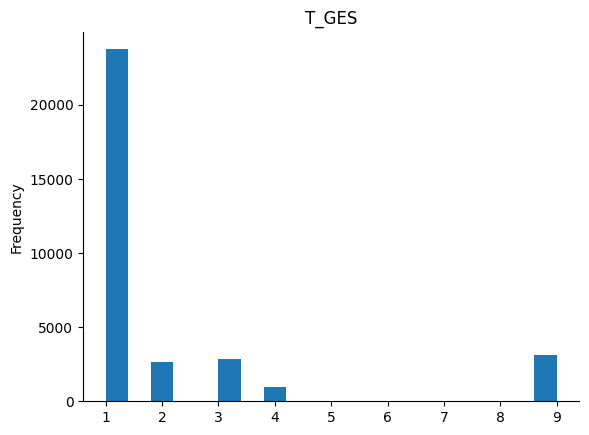

In [ ]:
# @title T_GES

from matplotlib import pyplot as plt
df['T_GES'].plot(kind='hist', bins=20, title='T_GES')
plt.gca().spines[['top', 'right',]].set_visible(False)

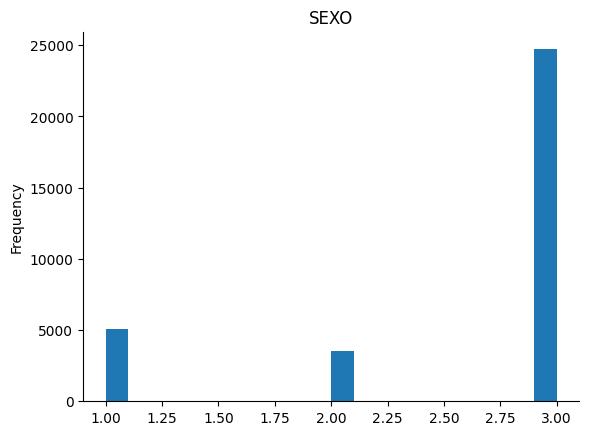

In [ ]:
# @title SEXO

from matplotlib import pyplot as plt
df['SEXO'].plot(kind='hist', bins=20, title='SEXO')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df.loc[df.P_PMAN_IRIS == "nan", "P_PMAN_IRIS"] = "6"
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6,9,1,1
11,3,0.0,1,1,1


In [8]:
df = pd.DataFrame(df, columns = ["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES", "ASIS_MED"])
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6,9,1,1
11,3,0.0,1,1,1
11,1,0.0,1,2,1
11,3,6,1,1,1


In [9]:
df["ASIS_MED"] = df.ASIS_MED.astype(str)
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6,9,1,1
11,3,0.0,1,1,1
11,1,0.0,1,2,1
11,3,6,1,1,1


In [10]:
df.loc[(df.ASIS_MED == "3"), 'ASIS_MED'] = "Ignorado"
df.loc[(df.ASIS_MED == "1"), 'ASIS_MED'] = "Si"
df.loc[(df.ASIS_MED == "2"), 'ASIS_MED'] = "No"
print(df)

          SEXO P_PMAN_IRIS  PESO_NAC  T_GES ASIS_MED
COD_DPTO                                            
70           3           6         9      1       Si
11           3         0.0         1      1       Si
11           1         0.0         1      2       Si
11           3           6         1      1       Si
11           2           6         3      3       Si
...        ...         ...       ...    ...      ...
41           3           6         1      1       Si
11           3           6         9      1       Si
11           3         0.0         9      1       Si
76           3           6         1      1       Si
11           3         0.0         1      1       Si

[33327 rows x 5 columns]


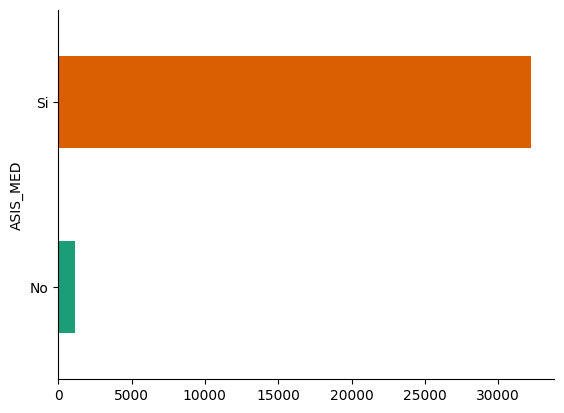

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ASIS_MED').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
df.head(3)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6,9,1,Si
11,3,0.0,1,1,Si
11,1,0.0,1,2,Si


In [15]:
x = df.drop("ASIS_MED", axis=1) # Variables explicativas
y = df["ASIS_MED"] # Variable respuesta

In [17]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [21]:
sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX) # Estandarizado los datos de entrenamiento para las variables explicativas
testX_scaled = scaler.transform(testX) # Estararizando los datos datos para las variables explicativas

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,20),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [22]:
mlp_clf = MLPClassifier(hidden_layer_sizes = (25, 26, 70, 23, 120, 40, 20), #  MLPClassifier: Percentrón multicapa para clasificación
                        max_iter = 1000, activation = 'logistic',
                        solver = 'sgd')
mlp_clf.fit(trainX, trainY) # Entrenamos una red neuronal

MLPClassifier(activation='logistic',
              hidden_layer_sizes=(25, 26, 70, 23, 120, 40, 20), max_iter=1000,
              solver='sgd')

In [25]:
y_pred = mlp_clf.predict(testX)
y_pred

array(['Si', 'Si', 'Si', ..., 'Si', 'Si', 'Si'], dtype='<U2')

In [27]:
accuracy_score(testY, y_pred)

0.9663966396639664

In [28]:
y_pred = mlp_clf.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.97


In [30]:
no_obs = np.array([[1.0,	1.0,	5,	4.0]])
mlp_clf.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['Si'], dtype='<U2')

In [31]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)

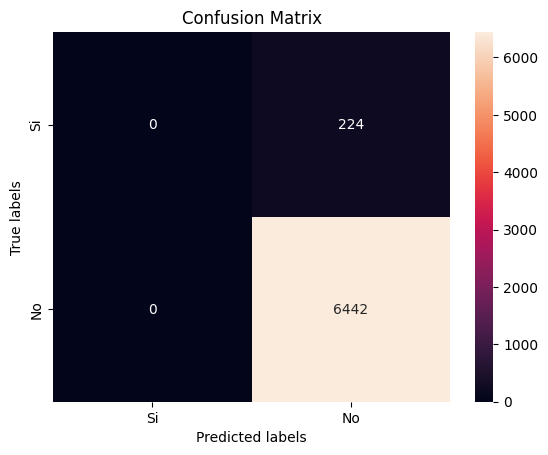

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Si', 'No']); ax.yaxis.set_ticklabels(['Si', 'No']);

Notemos de que nuestra red neuronal tiene una buena precisión, observese que para la categoría de la variable respuesta "si" se tiene una mala predicción. De esta manera, es importante tomar las variables explicativas cualitativas o explicativas como tal. Algo que en el percentrón multicapa de clasificación hacemos tomando las variables explicativas a través de las respectivas matrices dummie.

In [35]:
pd.get_dummies(x['SEXO'], dtype=float) # Matriz dummie para la variable sexo

,1,2,3
COD_DPTO,,,
70,0.0,0.0,1.0
11,0.0,0.0,1.0
11,1.0,0.0,0.0
11,0.0,0.0,1.0
11,0.0,1.0,0.0
...,...,...,...
41,0.0,0.0,1.0
11,0.0,0.0,1.0
11,0.0,0.0,1.0


# Variables cualitativas como entrada (variables explicativas sean cualitativas)

In [40]:
dummi1 = pd.get_dummies(x["SEXO"], dtype = float)
dummi1.columns = ["Masc", "Fem", "Desc"]
dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)
dummi2.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido", "Guerra"]
dummi3 = pd.get_dummies(x['PESO_NAC'], dtype=float)
dummi3.columns = ["< 1 Kg", "1-1.5 Kg", "1.5-2 Kg", "2-2.5 Kg", "2.5-3 Kg", "3-3.5 Kg", "3.5-4 Kg", "> 4 Kg", "Kg desco"]
dummi4 = pd.get_dummies(x['T_GES'], dtype=float)
dummi4.columns = ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]

          Natural  Homicidio  Accidente  Pendiente  Indeterminado  \
COD_DPTO                                                            
70            0.0        0.0        0.0        0.0            0.0   
11            1.0        0.0        0.0        0.0            0.0   
11            1.0        0.0        0.0        0.0            0.0   

          Desconocido  Guerra  
COD_DPTO                       
70                1.0     0.0  
11                0.0     0.0  
11                0.0     0.0  


In [42]:
dummi = pd.concat([dummi1, dummi2, dummi3, dummi4], axis = 1)
dummi.head(4)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,Guerra,...,3-3.5 Kg,3.5-4 Kg,> 4 Kg,Kg desco,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
train1, test1, train2, test2 = train_test_split(dummi, y, test_size = 0.2)

In [48]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes = (25, 26, 70, 23, 120, 40, 20), #  MLPClassifier: Percentrón multicapa para clasificación
                        max_iter = 1000, activation = 'logistic',
                        solver = 'sgd')
mlp_clf1.fit(train1, train2) # Entrenamos una red neuronal

MLPClassifier(activation='logistic',
              hidden_layer_sizes=(25, 26, 70, 23, 120, 40, 20), max_iter=1000,
              solver='sgd')

In [52]:
y_pred1 = mlp_clf1.predict(test1)
y_pred1

array(['Si', 'Si', 'Si', ..., 'Si', 'Si', 'Si'], dtype='<U2')

In [53]:
accuracy_score(test2, y_pred1)

0.9635463546354636

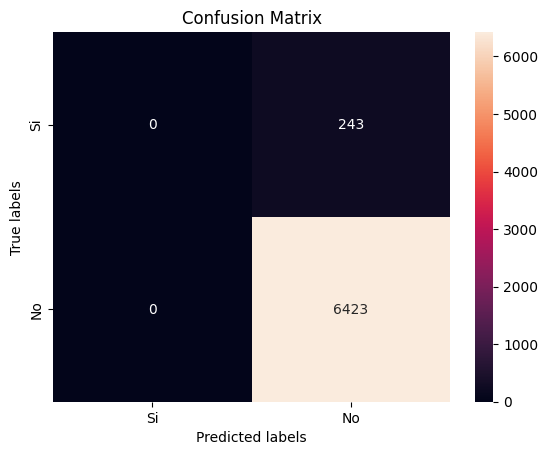

In [55]:
cm1 = confusion_matrix(test2, y_pred1)
ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Si', 'No']); ax.yaxis.set_ticklabels(['Si', 'No']);

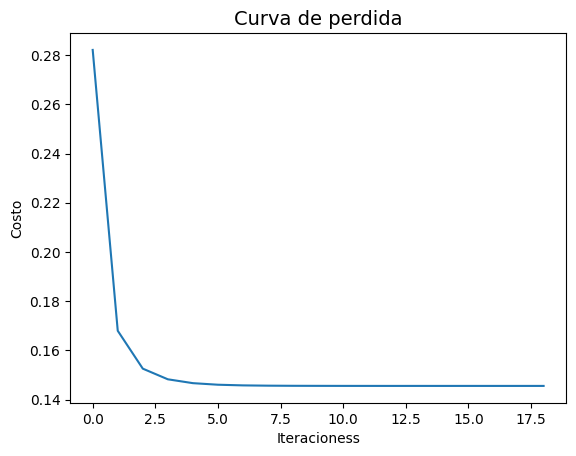

In [56]:
plt.plot(mlp_clf1.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

La red neuronal presenta una estimación de parámetros adecuada, ya que al aumentar las iteraciones disminuye la función de pérdida.